# I : notebook_EDA introduction

### I / A : Data dictionary

1. longitude
2. latitude
3. housingMedianAge: Âge médian d'une maison dans un pâté de maisons ; un chiffre plus bas correspond à un bâtiment plus récent.
4. totalRooms: Nombre total de chambres dans un bloc
5. totalBedrooms: Nombre total de chambres dans un bloc
6. population: Nombre total de personnes résidant dans un bloc
7. households: Nombre total de ménages, c'est-à-dire un groupe de personnes résidant dans une unité d'habitation, pour un bloc
8. medianIncome: Revenu médian des ménages dans un bloc de maisons (mesuré en dizaines de milliers de dollars US)
9. medianHouseValue: Valeur médiane des maisons pour les ménages d'un bloc (mesurée en dollars US)
10. oceanProximity: Situation de la maison par rapport à la mer

### I / B : Goal of this notebook.
In this notebook, we will do our Exploratory Data Analysis for the Silicon Valley project.
We will try to do that in a specific order and with comments in order to explain these different steps. We are going to use pipelines in the notebook_model. So, in this notebook, We will not transform our dataframe because we will handle this part in pipelines.

# II : Preliminary steps

### II / A : Importing libraries 

In [1]:
# Here, we import the libraries that we will use later.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ScikitLearn import
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### II / B : Importing and copying our dataset 

In [2]:
# We import the dataset from our folder, using pd.read_csv()
raw_df = pd.read_csv('data/4054a881-9509-4cc0-9501-1174d5bbf6fc.txt')
raw_df

,Unnamed: 0,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,2072,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,10600,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,2494,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,4284,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,16541,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...,...
16507,1099,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,18898,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,11798,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,6637,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


In [3]:
# Lets get rid of the first column, which is not in the dataset that we use
raw_df = raw_df.drop("Unnamed: 0", axis=1)
raw_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
16507,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


In [4]:
# Now we will create a copy of this dataframe, in order to keep it without clean and do all the changes inside the copy.
# This copy will be the dataframe that we will use.
clean_df = raw_df.copy()
clean_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
16507,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


In [5]:
# We can use .info() on this new dataframe to have a short preview of these data.
clean_df.info()

# 1st info: We have 10 columns, 9 features and 1 target (median_house_value).
# 2nd info: one of the feature seems to have missing data (total_bedrooms).
# 3rd info: all the features are of type float64, except for the ocean_proximity.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16336 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [25]:
# Drop rows with missing values
clean_df = clean_df.dropna(axis=0)
clean_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.84,36.77,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0,INLAND
1,-117.80,33.68,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0,<1H OCEAN
2,-120.19,36.60,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0,INLAND
3,-118.32,34.10,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0,<1H OCEAN
4,-121.23,37.79,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
16507,-121.90,39.59,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0,INLAND
16508,-122.25,38.11,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0,NEAR BAY
16509,-121.22,38.92,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0,INLAND
16510,-118.14,34.16,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0,<1H OCEAN


In [26]:
# We will do our first iteration with this train_df_1 dataframe, just to get a baseline score using only missing values
clean_df.to_csv("C:/Users/SImplon.co/Documents/JonathanRaso/simplon/Arturo/05_silcon_valley_linear/data/eda_clean_df.csv", index=False)

#### We are done with preliminary steps, and now we can go to the EDA

# III : Exploratory Data Analysis

### III / A : Basic exploration

In [6]:
# We want to have a short description of different statistics of our dataset, using .describe()
clean_df.describe()

# 1st info: there's a scale difference between some of our features, so maybe we will need to scale the data if needed.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16336.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.564046,35.626523,28.624516,2644.170603,539.319540,1435.017260,501.135962,3.864091,206509.251453
std,2.005033,2.139150,12.597980,2213.946369,425.207704,1158.151967,385.650673,1.893244,115225.957661
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1446.000000,296.000000,788.000000,280.000000,2.562500,119400.000000
50%,-118.490000,34.250000,29.000000,2116.000000,435.000000,1168.000000,410.000000,3.531300,179300.000000
75%,-118.010000,37.710000,37.000000,3154.000000,647.000000,1738.000000,606.000000,4.733225,264500.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### III / B : Duplicates and outliers

In [7]:
# We can also check if we have duplicated rows. If yes, we will remove the duplicate one 
# because it could lead to wrong predictions with our model.
clean_df.duplicated().sum()

# 1st info: the dataset has no duplicated rows.

0

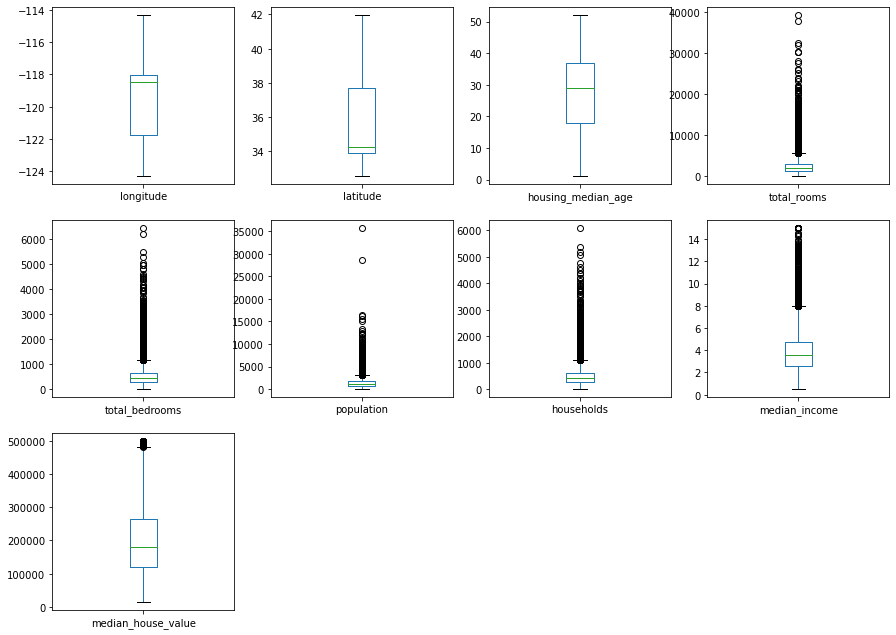

In [8]:
# For the outliers, we can boxplot our features to see if we have outliers.
clean_df.plot(kind='box', subplots=True, layout=(4, 4), figsize = (15, 15));

# 1st info: There's a lot of outliers in many features (total_rooms, total_bedrooms, population, households, median_income)
# We will keep them for the models.

### III / C : Univariate EDA

In [9]:
# We will create a new function for a preview of each feature.
def univariate_analysis(variable, stats):
    plt.subplot(1,2,1)
    sns.histplot(variable)
    plt.title("Histogram chart")
    plt.subplot(1,2,2)
    sns.boxplot(data=variable,orient="v")
    plt.title("Box plot")
    plt.subplots_adjust(wspace=0.5)
    if stats == True:
        print('Univariate preview')
        print(variable.describe())

Univariate preview
count    16512.000000
mean        28.624516
std         12.597980
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64


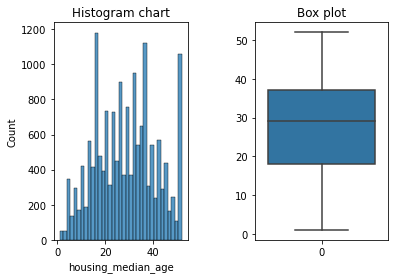

In [10]:
# Univariate preview for housing_median_age feature
univariate_analysis(clean_df.housing_median_age, True)

Univariate preview
count    16512.000000
mean      2644.170603
std       2213.946369
min          6.000000
25%       1446.000000
50%       2116.000000
75%       3154.000000
max      39320.000000
Name: total_rooms, dtype: float64


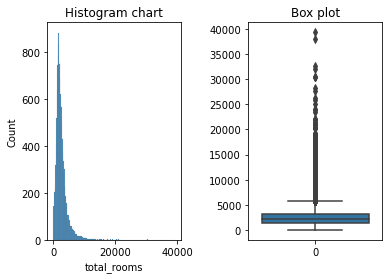

In [11]:
# Univariate preview for total_rooms feature
univariate_analysis(clean_df.total_rooms, True)

Univariate preview
count    16336.000000
mean       539.319540
std        425.207704
min          2.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64


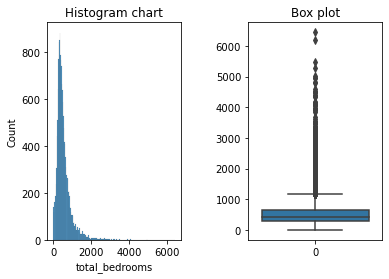

In [12]:
# Univariate preview for total_bedrooms feature
univariate_analysis(clean_df.total_bedrooms, True)

Univariate preview
count    16512.000000
mean      1435.017260
std       1158.151967
min          3.000000
25%        788.000000
50%       1168.000000
75%       1738.000000
max      35682.000000
Name: population, dtype: float64


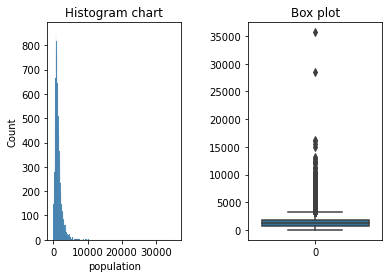

In [13]:
# Univariate preview for population feature
univariate_analysis(clean_df.population, True)

Univariate preview
count    16512.000000
mean       501.135962
std        385.650673
min          2.000000
25%        280.000000
50%        410.000000
75%        606.000000
max       6082.000000
Name: households, dtype: float64


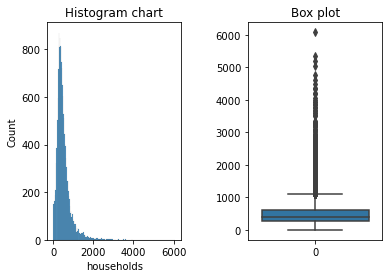

In [14]:
# Univariate preview for households feature
univariate_analysis(clean_df.households, True)

Univariate preview
count    16512.000000
mean         3.864091
std          1.893244
min          0.499900
25%          2.562500
50%          3.531300
75%          4.733225
max         15.000100
Name: median_income, dtype: float64


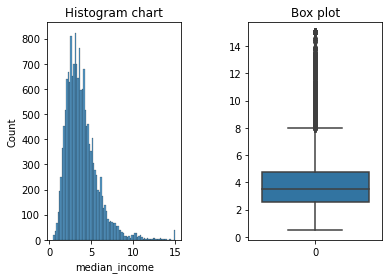

In [15]:
# Univariate preview for median_income feature
univariate_analysis(clean_df.median_income, True)

Univariate preview
count     16512.000000
mean     206509.251453
std      115225.957661
min       14999.000000
25%      119400.000000
50%      179300.000000
75%      264500.000000
max      500001.000000
Name: median_house_value, dtype: float64


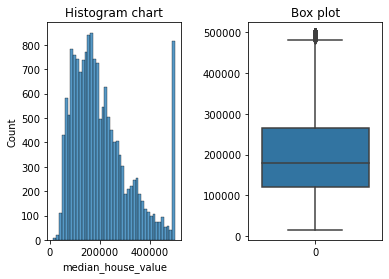

In [16]:
# Univariate preview for median_house_value feature
univariate_analysis(clean_df.median_house_value, True)

### III / D : Data visualization and Correlation matrix

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

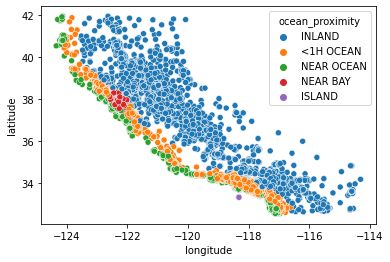

In [28]:
sns.scatterplot(data=clean_df, x="longitude", y="latitude", hue="ocean_proximity")

In [27]:
testing_corr = clean_df.corr()
testing_corr.style.background_gradient(cmap='coolwarm')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924739,-0.111057,0.045230,0.069623,0.099981,0.056494,-0.020201,-0.046419
latitude,-0.924739,1.000000,0.011399,-0.035165,-0.065210,-0.106251,-0.069326,-0.076014,-0.144143
housing_median_age,-0.111057,0.011399,1.000000,-0.361364,-0.324779,-0.295263,-0.307249,-0.112794,0.109763
total_rooms,0.045230,-0.035165,-0.361364,1.000000,0.932408,0.855906,0.920824,0.198769,0.132570
total_bedrooms,0.069623,-0.065210,-0.324779,0.932408,1.000000,0.878581,0.979994,-0.005643,0.047478
population,0.099981,-0.106251,-0.295263,0.855906,0.878581,1.000000,0.907529,0.004715,-0.028033
households,0.056494,-0.069326,-0.307249,0.920824,0.979994,0.907529,1.000000,0.015385,0.062674
median_income,-0.020201,-0.076014,-0.112794,0.198769,-0.005643,0.004715,0.015385,1.000000,0.689593
median_house_value,-0.046419,-0.144143,0.109763,0.132570,0.047478,-0.028033,0.062674,0.689593,1.000000
